In [329]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [330]:
df = pd.read_csv('BitcoinETFs_Dataset.csv')
df

,Symbol,ETF Name,Asset Class,Total Assets,YTD Price Change,Avg. Daily Volume,Previous Closing Price,1-Day Change,Inverse,Leveraged,...,Returns Rating,Volatility Rating,Dividend Rating,Concentration Rating,ESG Score,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),Carbon Intensity (Tons of CO2e / $M Sales),SRI Exclusion Criteria (%),Sustainable Impact Solutions (%)
0,GBTC,Grayscale Bitcoin Trust,Currency,"$22,293,700,000",73.28%,"18,849,860",$59.99,-1.72%,No,False,...,A+,C,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
1,IBIT,IShares Bitcoin Trust Registered,Currency,"$17,822,900,000",NaN,NaN,$38.41,-1.71%,No,False,...,NaN,C,C,NaN,0.00,NaN,NaN,NaN,NaN,NaN
2,FBTC,Fidelity Wise Origin Bitcoin Fund,Currency,"$10,254,300,000",NaN,NaN,$58.94,-1.65%,No,False,...,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
3,ARKB,ARK 21Shares Bitcoin ETF,Currency,"$2,989,220,000",NaN,NaN,$67.43,-1.62%,No,False,...,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
4,BITO,ProShares Bitcoin Strategy ETF,Currency,"$2,834,420,000",55.80%,"23,869,346",$29.51,-1.73%,No,False,...,A,C+,B,NaN,0.00,NaN,NaN,NaN,NaN,NaN
5,BITB,Bitwise Bitcoin ETF Trust,Currency,"$2,115,560,000",NaN,NaN,$36.73,-1.74%,No,False,...,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
6,ARKW,ARK Next Generation Internet ETF,Equity,"$1,673,050,000",5.40%,"258,557",$80.00,0.52%,No,False,...,C,C,B,C,4.82,20.72%,21.36%,11.24,6.61%,1.41%
7,BITX,2x Bitcoin Strategy ETF,Currency,"$1,586,210,000",108.48%,"3,335,591",$47.45,-3.50%,No,2x,...,NaN,C,C,NaN,0.00,NaN,NaN,NaN,NaN,NaN
8,HODL,VanEck Bitcoin Trust,Currency,"$621,879,000",NaN,NaN,$76.25,-1.64%,No,False,...,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
9,BRRR,Valkyrie Bitcoin Fund,Currency,"$534,678,000",NaN,NaN,$19.12,-1.70%,No,False,...,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN


In [331]:
print("Number of rows :", df.shape[0])
print("Number of columns :", df.shape[1])
print("="*100)

df.info()
print("="*100)
df.head() 

Number of rows : 34
Number of columns : 53
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Symbol                                      34 non-null     object 
 1   ETF Name                                    34 non-null     object 
 2   Asset Class                                 33 non-null     object 
 3   Total Assets                                34 non-null     object 
 4   YTD Price Change                            22 non-null     object 
 5   Avg. Daily Volume                           22 non-null     object 
 6   Previous Closing Price                      31 non-null     object 
 7   1-Day Change                                34 non-null     object 
 8   Inverse                                     34 non-null     object 
 9   Leveraged                                   34

,Symbol,ETF Name,Asset Class,Total Assets,YTD Price Change,Avg. Daily Volume,Previous Closing Price,1-Day Change,Inverse,Leveraged,...,Returns Rating,Volatility Rating,Dividend Rating,Concentration Rating,ESG Score,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),Carbon Intensity (Tons of CO2e / $M Sales),SRI Exclusion Criteria (%),Sustainable Impact Solutions (%)
0,GBTC,Grayscale Bitcoin Trust,Currency,"$22,293,700,000",73.28%,"18,849,860",$59.99,-1.72%,No,False,...,A+,C,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,IBIT,IShares Bitcoin Trust Registered,Currency,"$17,822,900,000",NaN,NaN,$38.41,-1.71%,No,False,...,NaN,C,C,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,FBTC,Fidelity Wise Origin Bitcoin Fund,Currency,"$10,254,300,000",NaN,NaN,$58.94,-1.65%,No,False,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,ARKB,ARK 21Shares Bitcoin ETF,Currency,"$2,989,220,000",NaN,NaN,$67.43,-1.62%,No,False,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,BITO,ProShares Bitcoin Strategy ETF,Currency,"$2,834,420,000",55.80%,"23,869,346",$29.51,-1.73%,No,False,...,A,C+,B,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [332]:
print(df.dtypes)

Symbol                                         object
ETF Name                                       object
Asset Class                                    object
Total Assets                                   object
YTD Price Change                               object
Avg. Daily Volume                              object
Previous Closing Price                         object
1-Day Change                                   object
Inverse                                        object
Leveraged                                      object
1 Week                                         object
1 Month                                        object
1 Year                                         object
3 Year                                         object
5 Year                                         object
YTD FF                                         object
1 Week FF                                      object
4 Week FF                                      object
1 Year FF                   

In [333]:
df.dropna(subset=['Total Assets ', 'Avg. Daily Volume', 'YTD Price Change'], inplace=True)

In [334]:
def clean_total_assets(value):
    return int(value.replace('$', '').replace(',', ''))

df['Total Assets '] = df['Total Assets '].apply(clean_total_assets)

print(df['Total Assets '].dtype)
print(df['Total Assets '].head())

int64
0     22293700000
4      2834420000
6      1673050000
7      1586210000
12      126785000
Name: Total Assets , dtype: int64


In [335]:
def clean_daily_volume(value):
    
    if pd.isna(value):
        return np.nan
    return int(str(value).replace(',', ''))

df['Avg. Daily Volume'] = df['Avg. Daily Volume'].apply(clean_daily_volume)

print(df['Avg. Daily Volume'].dtype)
print(df['Avg. Daily Volume'].head())

int64
0     18849860
4     23869346
6       258557
7      3335591
12      234063
Name: Avg. Daily Volume, dtype: int64


In [336]:
print(df['Total Assets '].head())

0     22293700000
4      2834420000
6      1673050000
7      1586210000
12      126785000
Name: Total Assets , dtype: int64


In [337]:
print(df['Avg. Daily Volume'].head())

0     18849860
4     23869346
6       258557
7      3335591
12      234063
Name: Avg. Daily Volume, dtype: int64


In [338]:
print(df['YTD Price Change'].head())

0      73.28%
4      55.80%
6       5.40%
7     108.48%
12      1.47%
Name: YTD Price Change, dtype: object


In [339]:
null_values_total_assets = df['Total Assets '].isnull().sum()
null_values_avg_daily_volume = df['Avg. Daily Volume'].isnull().sum()
null_values_YTD_Price_Change = df['YTD Price Change'].isnull().sum()

print("Null values in 'Total Assets' column:", null_values_total_assets)
print("Null values in 'Avg. Daily Volume' column:", null_values_avg_daily_volume)
print("Null values in 'YTD Price Change' column:", null_values_YTD_Price_Change)

Null values in 'Total Assets' column: 0
Null values in 'Avg. Daily Volume' column: 0
Null values in 'YTD Price Change' column: 0


In [340]:
print(df.dtypes)

Symbol                                         object
ETF Name                                       object
Asset Class                                    object
Total Assets                                    int64
YTD Price Change                               object
Avg. Daily Volume                               int64
Previous Closing Price                         object
1-Day Change                                   object
Inverse                                        object
Leveraged                                      object
1 Week                                         object
1 Month                                        object
1 Year                                         object
3 Year                                         object
5 Year                                         object
YTD FF                                         object
1 Week FF                                      object
4 Week FF                                      object
1 Year FF                   

In [341]:
def percentage_to_decimal(value):
    
    return float(value.strip('%')) / 100

df['YTD Price Change'] = df['YTD Price Change'].apply(percentage_to_decimal)

In [342]:
print(df['YTD Price Change'])

0     0.7328
4     0.5580
6     0.0540
7     1.0848
12    0.0147
13   -0.1272
15    0.4877
16    0.0106
17    0.1332
18    0.2470
19    0.1698
20    0.5553
21    0.5268
22    0.4511
23   -0.0293
24    0.5158
25    0.4719
26    0.4756
28    0.0027
29    0.0750
30    0.5563
31    0.3164
Name: YTD Price Change, dtype: float64


In [343]:
dependentVariable = df['YTD Price Change']

independentVariables = df[['Total Assets ', 'Avg. Daily Volume']]

In [344]:
independentVariables = sm.add_constant(independentVariables)

In [345]:
model = sm.OLS(dependentVariable, independentVariables).fit()

In [346]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       YTD Price Change   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1.760
Date:                Wed, 10 Apr 2024   Prob (F-statistic):              0.199
Time:                        01:03:37   Log-Likelihood:                -2.4023
No. Observations:                  22   AIC:                             10.80
Df Residuals:                      19   BIC:                             14.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2902      0.06

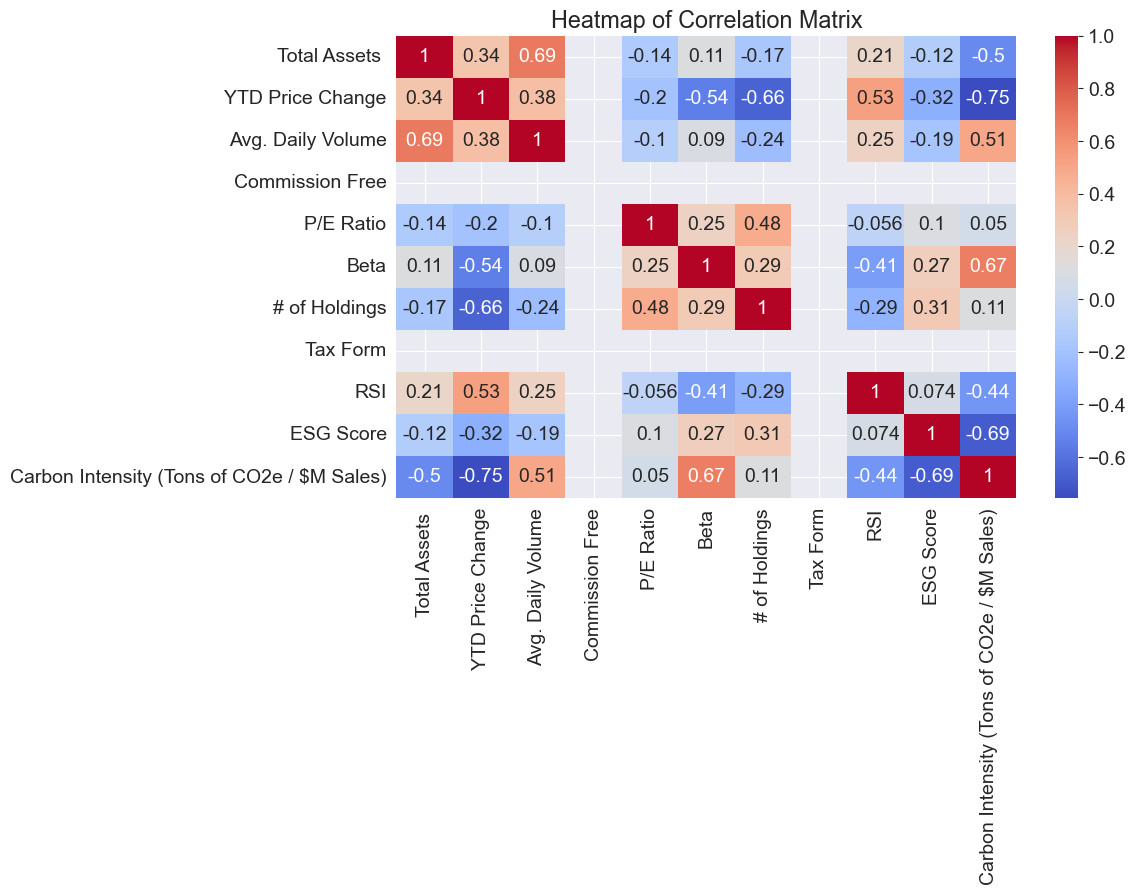

In [347]:
numeric_df = df.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()